In [8]:
import pandas as pd
import glob
# import plotly.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
# %matplotlib inline

li=[]

for filename in ["exp2-baseline.csv"]:
    df = pd.read_csv(filename,sep=',' , index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

pd.set_option('display.max_columns', None)
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance
0,hpccrandomringbw,3,16,4,4,2022-04-11T16:00:06Z,2022-04-11T16:00:10Z,2022-04-11T16:09:54Z,2022-04-11T16:09:54Z,10m30.920175927s,0.027710
1,hpccstream,3,16,4,4,2022-04-11T16:00:42Z,2022-04-11T16:00:46Z,2022-04-11T16:10:29Z,2022-04-11T16:10:29Z,10m25.232769186s,8.777020
2,nasep,1,16,4,4,2022-04-11T16:03:04Z,2022-04-11T16:03:09Z,2022-04-11T16:19:51Z,2022-04-11T16:19:52Z,17m23.434260876s,969.630000
3,hpccstream,0,16,4,4,2022-04-11T16:04:08Z,2022-04-11T16:04:13Z,2022-04-11T16:14:15Z,2022-04-11T16:14:15Z,10m49.012175673s,7.567170
4,hpccrandomringbw,2,16,4,4,2022-04-11T16:06:53Z,2022-04-11T16:10:39Z,2022-04-11T16:24:21Z,2022-04-11T16:24:22Z,18m4.045026618s,0.023880
5,hpccdgemm,0,16,4,4,2022-04-11T16:07:38Z,2022-04-11T16:11:10Z,2022-04-11T16:27:49Z,2022-04-11T16:27:51Z,20m44.010933319s,36.529600
6,hpccrandomringbw,0,16,4,4,2022-04-11T16:11:04Z,2022-04-11T16:15:00Z,2022-04-11T16:34:00Z,2022-04-11T16:34:00Z,23m32.901748155s,0.020352
7,nasep,2,16,4,4,2022-04-11T16:11:08Z,2022-04-11T16:20:30Z,2022-04-11T16:36:29Z,2022-04-11T16:36:29Z,25m58.898762277s,926.910000
8,hpccfft,0,16,4,4,2022-04-11T16:11:38Z,2022-04-11T16:24:59Z,2022-04-11T16:33:42Z,2022-04-11T16:33:42Z,22m38.910814894s,0.932306
9,hpccdgemm,1,16,4,4,2022-04-11T16:12:04Z,2022-04-11T16:28:26Z,2022-04-11T16:46:04Z,2022-04-11T16:46:04Z,34m42.903126027s,37.337600


In [9]:
print (df.dtypes)

benchmark       object
times            int64
nTasks           int64
nNodes           int64
nWorkers         int64
Pending         object
Running         object
Completing      object
Completed       object
duration        object
performance    float64
dtype: object


In [10]:
from datetime import datetime
df['Pending'] = pd.to_datetime(df['Pending'], format='%Y-%m-%d')
df['Running'] = pd.to_datetime(df['Running'], format='%Y-%m-%d')
df['Completing'] = pd.to_datetime(df['Completing'], format='%Y-%m-%d')
df['Completed'] = pd.to_datetime(df['Completed'], format='%Y-%m-%d')
df['duration'] = pd.to_timedelta(df['duration'])

In [11]:
df['init'] = df['Running'] - df['Pending']
df['run'] = df['Completing'] - df['Running']
df['final'] = df['Completed'] - df['Completing']
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance,init,run,final
0,hpccrandomringbw,3,16,4,4,2022-04-11 16:00:06+00:00,2022-04-11 16:00:10+00:00,2022-04-11 16:09:54+00:00,2022-04-11 16:09:54+00:00,0 days 00:10:30.920175927,0.027710,0 days 00:00:04,0 days 00:09:44,0 days 00:00:00
1,hpccstream,3,16,4,4,2022-04-11 16:00:42+00:00,2022-04-11 16:00:46+00:00,2022-04-11 16:10:29+00:00,2022-04-11 16:10:29+00:00,0 days 00:10:25.232769186,8.777020,0 days 00:00:04,0 days 00:09:43,0 days 00:00:00
2,nasep,1,16,4,4,2022-04-11 16:03:04+00:00,2022-04-11 16:03:09+00:00,2022-04-11 16:19:51+00:00,2022-04-11 16:19:52+00:00,0 days 00:17:23.434260876,969.630000,0 days 00:00:05,0 days 00:16:42,0 days 00:00:01
3,hpccstream,0,16,4,4,2022-04-11 16:04:08+00:00,2022-04-11 16:04:13+00:00,2022-04-11 16:14:15+00:00,2022-04-11 16:14:15+00:00,0 days 00:10:49.012175673,7.567170,0 days 00:00:05,0 days 00:10:02,0 days 00:00:00
4,hpccrandomringbw,2,16,4,4,2022-04-11 16:06:53+00:00,2022-04-11 16:10:39+00:00,2022-04-11 16:24:21+00:00,2022-04-11 16:24:22+00:00,0 days 00:18:04.045026618,0.023880,0 days 00:03:46,0 days 00:13:42,0 days 00:00:01
5,hpccdgemm,0,16,4,4,2022-04-11 16:07:38+00:00,2022-04-11 16:11:10+00:00,2022-04-11 16:27:49+00:00,2022-04-11 16:27:51+00:00,0 days 00:20:44.010933319,36.529600,0 days 00:03:32,0 days 00:16:39,0 days 00:00:02
6,hpccrandomringbw,0,16,4,4,2022-04-11 16:11:04+00:00,2022-04-11 16:15:00+00:00,2022-04-11 16:34:00+00:00,2022-04-11 16:34:00+00:00,0 days 00:23:32.901748155,0.020352,0 days 00:03:56,0 days 00:19:00,0 days 00:00:00
7,nasep,2,16,4,4,2022-04-11 16:11:08+00:00,2022-04-11 16:20:30+00:00,2022-04-11 16:36:29+00:00,2022-04-11 16:36:29+00:00,0 days 00:25:58.898762277,926.910000,0 days 00:09:22,0 days 00:15:59,0 days 00:00:00
8,hpccfft,0,16,4,4,2022-04-11 16:11:38+00:00,2022-04-11 16:24:59+00:00,2022-04-11 16:33:42+00:00,2022-04-11 16:33:42+00:00,0 days 00:22:38.910814894,0.932306,0 days 00:13:21,0 days 00:08:43,0 days 00:00:00
9,hpccdgemm,1,16,4,4,2022-04-11 16:12:04+00:00,2022-04-11 16:28:26+00:00,2022-04-11 16:46:04+00:00,2022-04-11 16:46:04+00:00,0 days 00:34:42.903126027,37.337600,0 days 00:16:22,0 days 00:17:38,0 days 00:00:00


In [12]:
df['start'] = df['Pending'][0]
df['afterstart'] = df['Pending'] - df['start']

In [13]:
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance,init,run,final,start,afterstart
0,hpccrandomringbw,3,16,4,4,2022-04-11 16:00:06+00:00,2022-04-11 16:00:10+00:00,2022-04-11 16:09:54+00:00,2022-04-11 16:09:54+00:00,0 days 00:10:30.920175927,0.027710,0 days 00:00:04,0 days 00:09:44,0 days 00:00:00,2022-04-11 16:00:06+00:00,0 days 00:00:00
1,hpccstream,3,16,4,4,2022-04-11 16:00:42+00:00,2022-04-11 16:00:46+00:00,2022-04-11 16:10:29+00:00,2022-04-11 16:10:29+00:00,0 days 00:10:25.232769186,8.777020,0 days 00:00:04,0 days 00:09:43,0 days 00:00:00,2022-04-11 16:00:06+00:00,0 days 00:00:36
2,nasep,1,16,4,4,2022-04-11 16:03:04+00:00,2022-04-11 16:03:09+00:00,2022-04-11 16:19:51+00:00,2022-04-11 16:19:52+00:00,0 days 00:17:23.434260876,969.630000,0 days 00:00:05,0 days 00:16:42,0 days 00:00:01,2022-04-11 16:00:06+00:00,0 days 00:02:58
3,hpccstream,0,16,4,4,2022-04-11 16:04:08+00:00,2022-04-11 16:04:13+00:00,2022-04-11 16:14:15+00:00,2022-04-11 16:14:15+00:00,0 days 00:10:49.012175673,7.567170,0 days 00:00:05,0 days 00:10:02,0 days 00:00:00,2022-04-11 16:00:06+00:00,0 days 00:04:02
4,hpccrandomringbw,2,16,4,4,2022-04-11 16:06:53+00:00,2022-04-11 16:10:39+00:00,2022-04-11 16:24:21+00:00,2022-04-11 16:24:22+00:00,0 days 00:18:04.045026618,0.023880,0 days 00:03:46,0 days 00:13:42,0 days 00:00:01,2022-04-11 16:00:06+00:00,0 days 00:06:47
5,hpccdgemm,0,16,4,4,2022-04-11 16:07:38+00:00,2022-04-11 16:11:10+00:00,2022-04-11 16:27:49+00:00,2022-04-11 16:27:51+00:00,0 days 00:20:44.010933319,36.529600,0 days 00:03:32,0 days 00:16:39,0 days 00:00:02,2022-04-11 16:00:06+00:00,0 days 00:07:32
6,hpccrandomringbw,0,16,4,4,2022-04-11 16:11:04+00:00,2022-04-11 16:15:00+00:00,2022-04-11 16:34:00+00:00,2022-04-11 16:34:00+00:00,0 days 00:23:32.901748155,0.020352,0 days 00:03:56,0 days 00:19:00,0 days 00:00:00,2022-04-11 16:00:06+00:00,0 days 00:10:58
7,nasep,2,16,4,4,2022-04-11 16:11:08+00:00,2022-04-11 16:20:30+00:00,2022-04-11 16:36:29+00:00,2022-04-11 16:36:29+00:00,0 days 00:25:58.898762277,926.910000,0 days 00:09:22,0 days 00:15:59,0 days 00:00:00,2022-04-11 16:00:06+00:00,0 days 00:11:02
8,hpccfft,0,16,4,4,2022-04-11 16:11:38+00:00,2022-04-11 16:24:59+00:00,2022-04-11 16:33:42+00:00,2022-04-11 16:33:42+00:00,0 days 00:22:38.910814894,0.932306,0 days 00:13:21,0 days 00:08:43,0 days 00:00:00,2022-04-11 16:00:06+00:00,0 days 00:11:32
9,hpccdgemm,1,16,4,4,2022-04-11 16:12:04+00:00,2022-04-11 16:28:26+00:00,2022-04-11 16:46:04+00:00,2022-04-11 16:46:04+00:00,0 days 00:34:42.903126027,37.337600,0 days 00:16:22,0 days 00:17:38,0 days 00:00:00,2022-04-11 16:00:06+00:00,0 days 00:11:58


In [14]:
df['benchmark'].unique()

array(['hpccrandomringbw', 'hpccstream', 'nasep', 'hpccdgemm', 'hpccfft'],
      dtype=object)

In [15]:
df['nWorkers'].unique()

array([4])

#  performance

In [16]:
from numpy import percentile, mean, std

l_gb = ['benchmark', 'nTasks', 'nNodes','nWorkers']

df_performance = []

for model_name in df['benchmark'].unique():
       df_bench = df[(df['benchmark']==model_name)] # everybenchmark
       for nWorkers in df_bench.nWorkers.unique():
            df_senario = df_bench[df_bench.nWorkers == nWorkers]
            df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
                  'model_time_mean' : mean(x['performance']),
                  'model_time_std' : std(x['performance']),
              })).reset_index()
            df_performance.append(df_senario)

In [17]:
df_performance = pd.concat(df_performance, axis=0)
df_performance

,benchmark,nTasks,nNodes,nWorkers,model_time_mean,model_time_std
0,hpccrandomringbw,16,4,4,0.023980,0.003005
0,hpccstream,16,4,4,8.172095,0.604925
0,nasep,16,4,4,948.270000,21.360000
0,hpccdgemm,16,4,4,36.933600,0.404000
0,hpccfft,16,4,4,0.932306,0.000000


          benchmark  nTasks  nNodes  nWorkers  model_time_mean  model_time_std
0  hpccrandomringbw      16       4         4          0.02398        0.003005
    benchmark  nTasks  nNodes  nWorkers  model_time_mean  model_time_std
0  hpccstream      16       4         4         8.172095        0.604925
  benchmark  nTasks  nNodes  nWorkers  model_time_mean  model_time_std
0     nasep      16       4         4           948.27           21.36
   benchmark  nTasks  nNodes  nWorkers  model_time_mean  model_time_std
0  hpccdgemm      16       4         4          36.9336           0.404
  benchmark  nTasks  nNodes  nWorkers  model_time_mean  model_time_std
0   hpccfft      16       4         4         0.932306             0.0


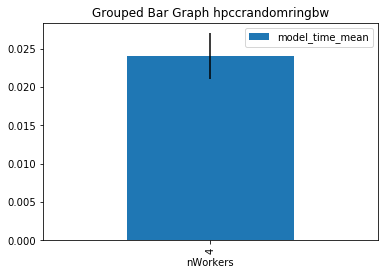

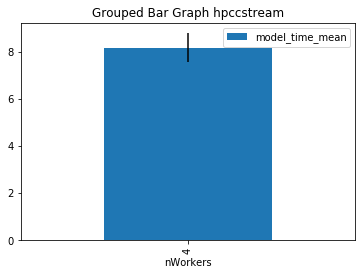

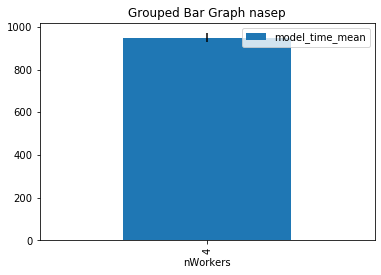

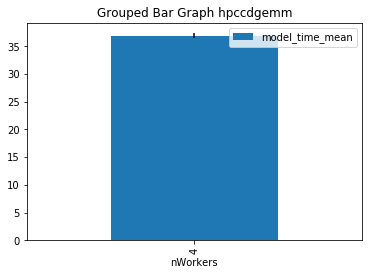

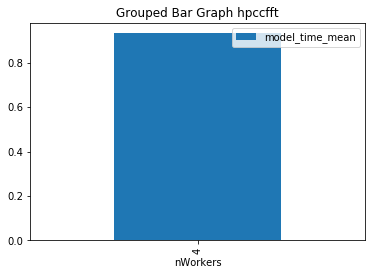

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

for model_name in df_performance['benchmark'].unique():
    df_bench = df_performance[(df_performance['benchmark']==model_name)] # everybenchmark
    print(df_bench)
    # plot grouped bar chart
    df_bench.plot(x='nWorkers',
                  y='model_time_mean',
                  yerr='model_time_std',
                    kind='bar',
                    stacked=False,
                    title=f"Grouped Bar Graph {model_name}")

#  time slot

In [19]:
from numpy import percentile, mean, std

l_gb = ['benchmark', 'nTasks', 'nNodes','nWorkers']

df_time = []

for model_name in df['benchmark'].unique():
       df_bench = df[(df['benchmark']==model_name)] # everybenchmark
       for nWorkers in df_bench.nWorkers.unique():
            df_senario = df_bench[df_bench.nWorkers == nWorkers]
            df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
                  'init_mean' : mean(x['init']),
                  'init_std' : std(x['init']),
                'run_mean' : mean(x['run']),
                  'run_std' : std(x['run']),
                'final_mean' : mean(x['final']),
                  'final_std' : std(x['final']),
                'duration_mean' : mean(x['duration']),
                  'duration_std' : std(x['duration']),
              })).reset_index()
            df_time.append(df_senario)

In [20]:
df_time = pd.concat(df_time, axis=0)
df_time

,benchmark,nTasks,nNodes,nWorkers,init_mean,init_std,run_mean,run_std,final_mean,final_std,duration_mean,duration_std
0,hpccrandomringbw,16,4,4,0 days 00:02:35.333333333,0 days 00:01:47.086673099,0 days 00:14:08.666666666,0 days 00:03:47.767913065,0 days 00:00:00.333333333,0 days 00:00:00.471404520,0 days 00:17:22.622316900,0 days 00:05:20.583504967
0,hpccstream,16,4,4,0 days 00:00:04.500000,0 days 00:00:00.500000,0 days 00:09:52.500000,0 days 00:00:09.500000,0 days 00:00:00,0 days 00:00:00,0 days 00:10:37.122472429,0 days 00:00:11.889703243
0,nasep,16,4,4,0 days 00:04:43.500000,0 days 00:04:38.500000,0 days 00:16:20.500000,0 days 00:00:21.500000,0 days 00:00:00.500000,0 days 00:00:00.500000,0 days 00:21:41.166511576,0 days 00:04:17.732250700
0,hpccdgemm,16,4,4,0 days 00:09:57,0 days 00:06:25,0 days 00:17:08.500000,0 days 00:00:29.500000,0 days 00:00:01,0 days 00:00:01,0 days 00:27:43.457029673,0 days 00:06:59.446096354
0,hpccfft,16,4,4,0 days 00:13:21,0 days 00:00:00,0 days 00:08:43,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:22:38.910814894,0 days 00:00:00


<ipython-input-21-dbdb2ccec5d7>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-21-dbdb2ccec5d7>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



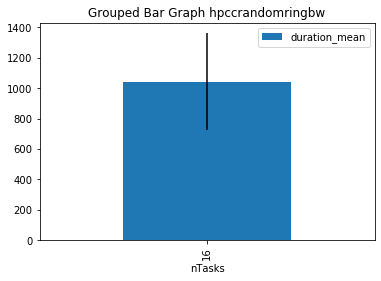

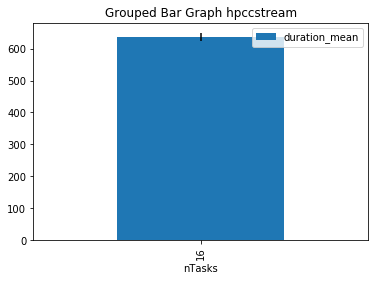

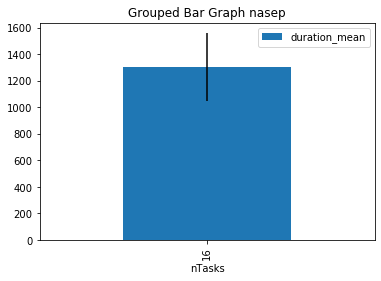

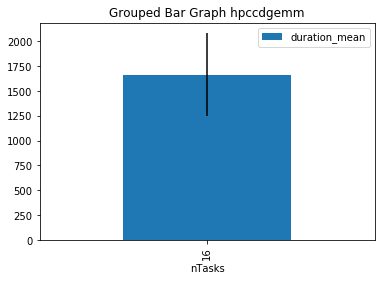

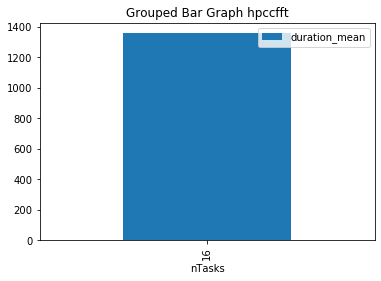

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

for model_name in df_time['benchmark'].unique():
    df_bench = df_time[(df_time['benchmark']==model_name)] # everybenchmark
    df_bench['duration_mean'] = df_bench['duration_mean'].dt.total_seconds()
    df_bench['duration_std'] = df_bench['duration_std'].dt.total_seconds()

    # plot grouped bar chart
    df_bench.plot(x='nTasks',
                  y='duration_mean',
                  yerr='duration_std',
                    kind='bar',
                    stacked=False,
                    title=f"Grouped Bar Graph {model_name}")

In [22]:
from numpy import percentile, mean, std

l_gb = ['benchmark', 'nTasks']

df_time = []

for model_name in df['benchmark'].unique():
       df_bench = df[(df['benchmark']==model_name)] # everybenchmark
       for nTasks in df_bench.nTasks.unique():
            df_senario = df_bench[df_bench.nTasks == nTasks]
            df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
                  'init_sum' : sum(x['init'].dt.total_seconds()),
                'run_sum' : sum(x['run'].dt.total_seconds()),
                'final_sum' : sum(x['final'].dt.total_seconds()),
                'duration_sum' : sum(x['duration'].dt.total_seconds()),
              })).reset_index()
            df_time.append(df_senario)

In [23]:
df_time = pd.concat(df_time, axis=0)
df_time

,benchmark,nTasks,init_sum,run_sum,final_sum,duration_sum
0,hpccrandomringbw,16,466.0,2546.0,1.0,3127.866951
0,hpccstream,16,9.0,1185.0,0.0,1274.244945
0,nasep,16,567.0,1961.0,1.0,2602.333023
0,hpccdgemm,16,1194.0,2057.0,2.0,3326.914059
0,hpccfft,16,801.0,523.0,0.0,1358.910815


<ipython-input-24-1521fc477d73>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



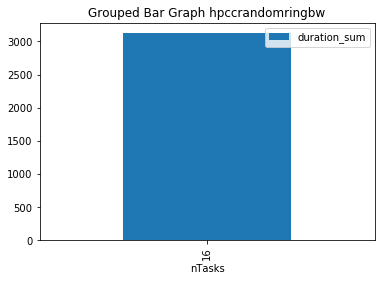

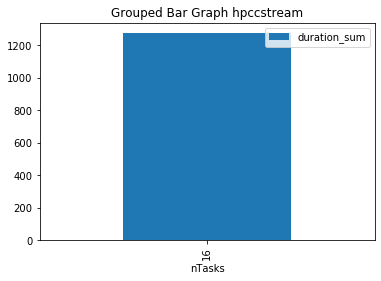

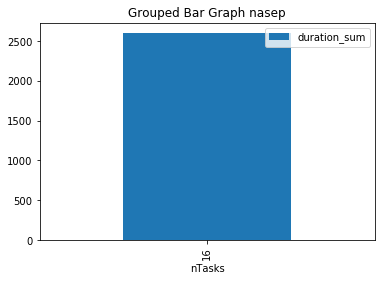

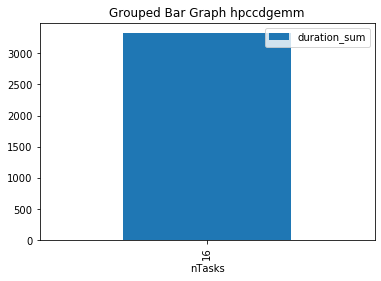

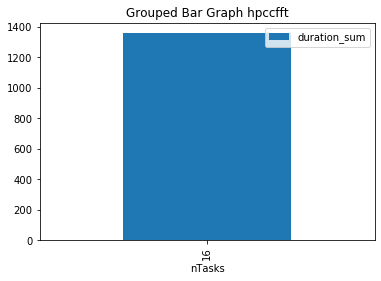

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

for model_name in df_time['benchmark'].unique():
    df_bench = df_time[(df_time['benchmark']==model_name)] # everybenchmark
    df_bench['duration_sum'] = df_bench['duration_sum']

    # plot grouped bar chart
    df_bench.plot(x='nTasks',
                  y='duration_sum',
                    kind='bar',
                    stacked=False,
                    title=f"Grouped Bar Graph {model_name}")

# Graph

In [25]:
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance,init,run,final,start,afterstart
0,hpccrandomringbw,3,16,4,4,2022-04-11 16:00:06+00:00,2022-04-11 16:00:10+00:00,2022-04-11 16:09:54+00:00,2022-04-11 16:09:54+00:00,0 days 00:10:30.920175927,0.027710,0 days 00:00:04,0 days 00:09:44,0 days 00:00:00,2022-04-11 16:00:06+00:00,0 days 00:00:00
1,hpccstream,3,16,4,4,2022-04-11 16:00:42+00:00,2022-04-11 16:00:46+00:00,2022-04-11 16:10:29+00:00,2022-04-11 16:10:29+00:00,0 days 00:10:25.232769186,8.777020,0 days 00:00:04,0 days 00:09:43,0 days 00:00:00,2022-04-11 16:00:06+00:00,0 days 00:00:36
2,nasep,1,16,4,4,2022-04-11 16:03:04+00:00,2022-04-11 16:03:09+00:00,2022-04-11 16:19:51+00:00,2022-04-11 16:19:52+00:00,0 days 00:17:23.434260876,969.630000,0 days 00:00:05,0 days 00:16:42,0 days 00:00:01,2022-04-11 16:00:06+00:00,0 days 00:02:58
3,hpccstream,0,16,4,4,2022-04-11 16:04:08+00:00,2022-04-11 16:04:13+00:00,2022-04-11 16:14:15+00:00,2022-04-11 16:14:15+00:00,0 days 00:10:49.012175673,7.567170,0 days 00:00:05,0 days 00:10:02,0 days 00:00:00,2022-04-11 16:00:06+00:00,0 days 00:04:02
4,hpccrandomringbw,2,16,4,4,2022-04-11 16:06:53+00:00,2022-04-11 16:10:39+00:00,2022-04-11 16:24:21+00:00,2022-04-11 16:24:22+00:00,0 days 00:18:04.045026618,0.023880,0 days 00:03:46,0 days 00:13:42,0 days 00:00:01,2022-04-11 16:00:06+00:00,0 days 00:06:47
5,hpccdgemm,0,16,4,4,2022-04-11 16:07:38+00:00,2022-04-11 16:11:10+00:00,2022-04-11 16:27:49+00:00,2022-04-11 16:27:51+00:00,0 days 00:20:44.010933319,36.529600,0 days 00:03:32,0 days 00:16:39,0 days 00:00:02,2022-04-11 16:00:06+00:00,0 days 00:07:32
6,hpccrandomringbw,0,16,4,4,2022-04-11 16:11:04+00:00,2022-04-11 16:15:00+00:00,2022-04-11 16:34:00+00:00,2022-04-11 16:34:00+00:00,0 days 00:23:32.901748155,0.020352,0 days 00:03:56,0 days 00:19:00,0 days 00:00:00,2022-04-11 16:00:06+00:00,0 days 00:10:58
7,nasep,2,16,4,4,2022-04-11 16:11:08+00:00,2022-04-11 16:20:30+00:00,2022-04-11 16:36:29+00:00,2022-04-11 16:36:29+00:00,0 days 00:25:58.898762277,926.910000,0 days 00:09:22,0 days 00:15:59,0 days 00:00:00,2022-04-11 16:00:06+00:00,0 days 00:11:02
8,hpccfft,0,16,4,4,2022-04-11 16:11:38+00:00,2022-04-11 16:24:59+00:00,2022-04-11 16:33:42+00:00,2022-04-11 16:33:42+00:00,0 days 00:22:38.910814894,0.932306,0 days 00:13:21,0 days 00:08:43,0 days 00:00:00,2022-04-11 16:00:06+00:00,0 days 00:11:32
9,hpccdgemm,1,16,4,4,2022-04-11 16:12:04+00:00,2022-04-11 16:28:26+00:00,2022-04-11 16:46:04+00:00,2022-04-11 16:46:04+00:00,0 days 00:34:42.903126027,37.337600,0 days 00:16:22,0 days 00:17:38,0 days 00:00:00,2022-04-11 16:00:06+00:00,0 days 00:11:58


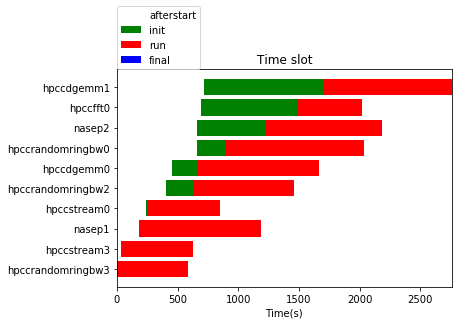

In [26]:
import numpy as np
import matplotlib.pyplot as plt

color=['white','green','red','blue']

y1 = df['afterstart'].dt.total_seconds()
y2 = df['init'].dt.total_seconds()
y3 = df['run'].dt.total_seconds()
y4 = df['final'].dt.total_seconds()

labels = df['benchmark']+df['times'].map(str)

plt.barh(labels, y1, color='white', label='afterstart')
plt.barh(labels, y2, left=y1, color='green', label='init')
plt.barh(labels, y3, left=y1+y2, color='red', label='run')
plt.barh(labels, y4, left=y1+y2+y3, color='blue', label='final')

plt.title("Time slot")                                                        #图片标题
plt.xlabel("Time(s)")                                                              #x轴标题
plt.legend(loc=[0, 1])                                                             #图例的显示位置设置
# plt.savefig("Error Analysis.png", bbox_inches='tight')          #保存图片命令一定要放在plt.show()前面
plt.show()
